In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-strom-6-0/sample_submission_storming_round.csv
/kaggle/input/data-strom-6-0/train_storming_round.csv
/kaggle/input/data-strom-6-0/test_storming_round.csv


# Over view on data set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/kaggle/input/data-strom-6-0/train_storming_round.csv')
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,15304,d3b44e44,43,4/1/2019,10/1/2023,8/1/2024,1,6,6,17,...,10,3,4,11,18,25,2473900,404980,18,100
15304,15305,0b1d7054,28,9/1/2022,3/1/2024,8/1/2024,1,5,3,13,...,14,4,3,11,18,15,922050,198187,18,120
15305,15306,51321fa2,45,1/1/2021,4/1/2024,8/1/2024,0,6,17,26,...,22,6,7,6,19,30,645330,133263,57,270
15306,15307,dd4a0d2d,25,12/1/2021,12/1/2023,8/1/2024,0,4,6,14,...,13,6,3,6,15,0,0,32546,30,171


In [5]:
test=pd.read_csv('/kaggle/input/data-strom-6-0/test_storming_round.csv')

In [6]:
test

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,de9a845f,43,6/1/2020,4/1/2022,9/1/2024,0,2,12,17,...,14,6,9,5,20,24,511320,86955,0,48
1,2,1450745b,32,5/1/2019,8/1/2022,9/1/2024,1,3,4,13,...,12,2,2,5,9,14,296660,55062,9,56
2,3,5c4dd08c,52,6/1/2019,6/1/2022,9/1/2024,2,6,17,27,...,21,5,6,10,21,34,833544,224429,0,34
3,4,3c7a8b50,21,5/1/2021,9/1/2023,9/1/2024,1,6,17,26,...,15,3,2,10,15,33,2972409,439159,15,33
4,5,3dd0c2a1,33,9/1/2022,11/1/2023,9/1/2024,0,4,2,8,...,14,5,4,6,15,15,168150,18195,60,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,8f77f8e4,55,5/1/2020,1/1/2022,9/1/2024,2,1,11,16,...,15,4,3,7,14,21,1143954,313127,14,21
910,911,a199082b,60,10/1/2021,11/1/2022,9/1/2024,2,1,15,21,...,19,2,4,2,8,26,2169310,267832,8,78
911,912,9c2e3be7,45,7/1/2022,7/1/2023,9/1/2024,3,5,14,27,...,23,3,2,10,15,34,1980194,449309,60,238
912,913,89cb3dd5,23,5/1/2021,6/1/2023,9/1/2024,3,5,7,19,...,10,3,7,3,13,28,2489004,462418,13,56


**Target creation**

In [7]:
import pandas as pd

# Ensure datetime format
df['year_month'] = pd.to_datetime(df['year_month'])
test['year_month'] = pd.to_datetime(test['year_month'])

# Add helper column to train: next mnth
df['next_month'] = df['year_month'] + pd.DateOffset(months=1)

# Combine train and test for lookup
combined_df = pd.concat([df[['agent_code', 'year_month', 'new_policy_count']],
                         test[['agent_code', 'year_month', 'new_policy_count']]])

# Create lookup: (agent_code, year_month) → new_policy_count
lookup = combined_df.set_index(['agent_code', 'year_month'])['new_policy_count']

# Function to get next_month_nil for each train row
def get_next_month_nil(row):
    key = (row['agent_code'], row['next_month'])
    if key in lookup:
        return 0 if lookup[key] == 0 else 1
    return None
def get_next_month_value(row):
    key = (row['agent_code'], row['next_month'])
    if key in lookup:
        return lookup[key] 
    return None
# Apply to train only
df['next_month_nil'] = df.apply(get_next_month_nil, axis=1)
df['next_month_policy_count'] = df.apply(get_next_month_value, axis=1)
# Drop helper column
df.drop(columns=['next_month'], inplace=True)
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,next_month_nil,next_month_policy_count
0,1,455ca878,45,2/1/2021,9/1/2023,2023-01-01,3,6,2,12,...,4,8,15,0,0,93313,30,162,1,14
1,2,c823ce77,48,4/1/2022,2/1/2024,2023-01-01,1,4,12,21,...,3,10,17,25,1071450,164804,0,175,1,31
2,3,62154055,53,5/1/2020,9/1/2023,2023-01-01,3,5,5,17,...,7,11,21,26,1601210,426690,84,78,1,31
3,4,c58bfa6e,44,7/1/2019,3/1/2022,2023-01-01,1,0,12,17,...,2,9,13,18,283230,47793,39,144,1,31
4,5,b1e5f770,20,9/1/2020,2/1/2023,2023-01-01,0,6,10,17,...,10,6,19,20,1957680,562239,19,40,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,15304,d3b44e44,43,4/1/2019,10/1/2023,2024-08-01,1,6,6,17,...,4,11,18,25,2473900,404980,18,100,0,0
15304,15305,0b1d7054,28,9/1/2022,3/1/2024,2024-08-01,1,5,3,13,...,3,11,18,15,922050,198187,18,120,1,35
15305,15306,51321fa2,45,1/1/2021,4/1/2024,2024-08-01,0,6,17,26,...,7,6,19,30,645330,133263,57,270,1,36
15306,15307,dd4a0d2d,25,12/1/2021,12/1/2023,2024-08-01,0,4,6,14,...,3,6,15,0,0,32546,30,171,1,11


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   row_id                           15308 non-null  int64         
 1   agent_code                       15308 non-null  object        
 2   agent_age                        15308 non-null  int64         
 3   agent_join_month                 15308 non-null  object        
 4   first_policy_sold_month          15308 non-null  object        
 5   year_month                       15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days     15308 non-null  int64         
 7   unique_proposals_last_15_days    15308 non-null  int64         
 8   unique_proposals_last_21_days    15308 non-null  int64         
 9   unique_proposal                  15308 non-null  int64         
 10  unique_quotations_last_7_days    15308 non-null  int64    

# ***Data Analysis*** 

# 1. Key Metrics and Distributions (Summary Statistics)

Goal: Understand the central tendencies and spread of each numeric variable.

In [9]:
df.describe()
df.info()
print("null counts")
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   row_id                           15308 non-null  int64         
 1   agent_code                       15308 non-null  object        
 2   agent_age                        15308 non-null  int64         
 3   agent_join_month                 15308 non-null  object        
 4   first_policy_sold_month          15308 non-null  object        
 5   year_month                       15308 non-null  datetime64[ns]
 6   unique_proposals_last_7_days     15308 non-null  int64         
 7   unique_proposals_last_15_days    15308 non-null  int64         
 8   unique_proposals_last_21_days    15308 non-null  int64         
 9   unique_proposal                  15308 non-null  int64         
 10  unique_quotations_last_7_days    15308 non-null  int64    

row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
next_month_nil                     0
next_month_policy_count            0
dtype: int64

**No null values present in the data set**

array([[<Axes: title={'center': 'row_id'}>,
        <Axes: title={'center': 'agent_age'}>,
        <Axes: title={'center': 'year_month'}>,
        <Axes: title={'center': 'unique_proposals_last_7_days'}>,
        <Axes: title={'center': 'unique_proposals_last_15_days'}>],
       [<Axes: title={'center': 'unique_proposals_last_21_days'}>,
        <Axes: title={'center': 'unique_proposal'}>,
        <Axes: title={'center': 'unique_quotations_last_7_days'}>,
        <Axes: title={'center': 'unique_quotations_last_15_days'}>,
        <Axes: title={'center': 'unique_quotations_last_21_days'}>],
       [<Axes: title={'center': 'unique_quotations'}>,
        <Axes: title={'center': 'unique_customers_last_7_days'}>,
        <Axes: title={'center': 'unique_customers_last_15_days'}>,
        <Axes: title={'center': 'unique_customers_last_21_days'}>,
        <Axes: title={'center': 'unique_customers'}>],
       [<Axes: title={'center': 'new_policy_count'}>,
        <Axes: title={'center': 'ANBP_v

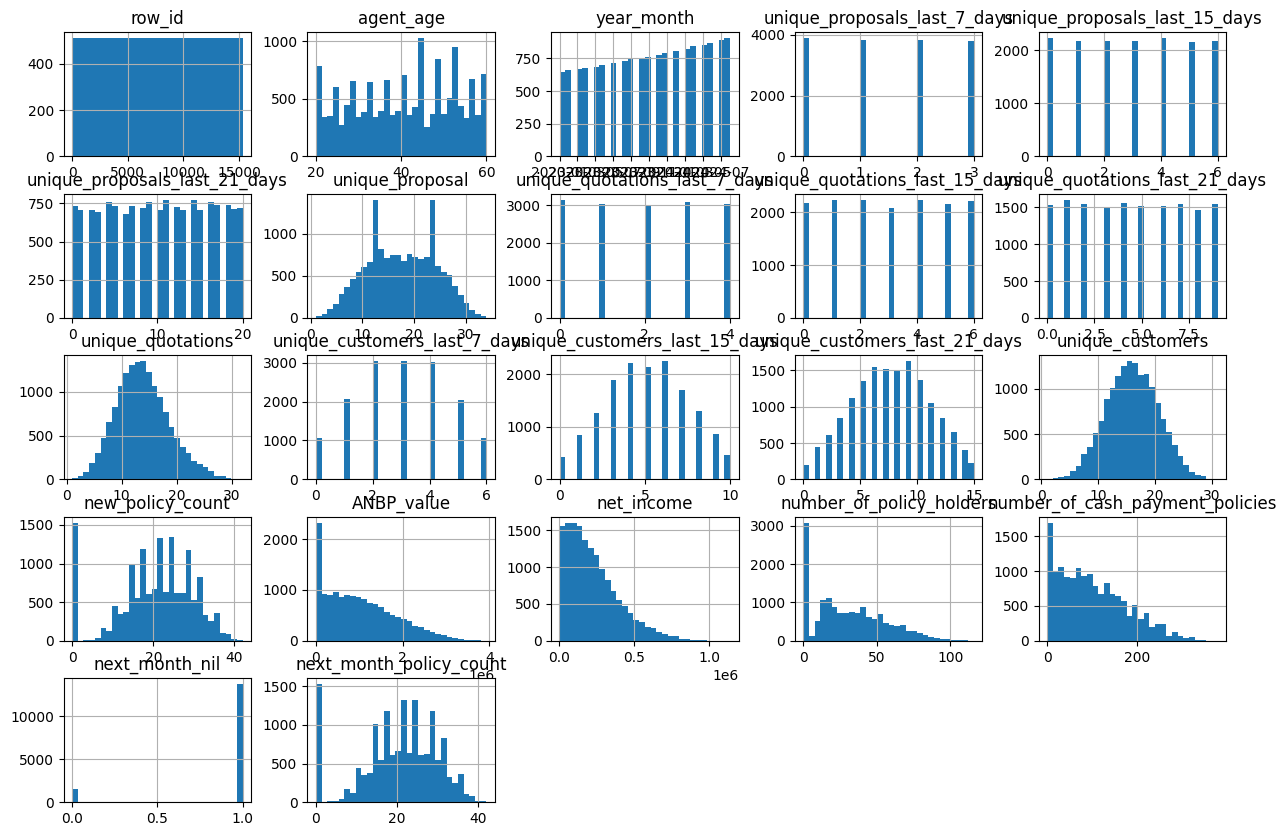

In [10]:
df.hist(bins=30, figsize=(15, 10))

In [11]:
import pandas as pd

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate mean, median, and mode for each numerical column
summary_stats = pd.DataFrame({
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Mode': numerical_df.mode().iloc[0]  # Take the first mode if multiple
})

# Display the result
print("Summary Statistics (Mean, Median, Mode):")
print(summary_stats)


Summary Statistics (Mean, Median, Mode):
                                         Mean    Median     Mode
row_id                           7.654500e+03    7654.5      1.0
agent_age                        4.058577e+01      41.0     48.0
unique_proposals_last_7_days     1.491246e+00       1.0      0.0
unique_proposals_last_15_days    2.991116e+00       3.0      0.0
unique_proposals_last_21_days    1.004573e+01      10.0     11.0
unique_proposal                  1.751653e+01      17.0     14.0
unique_quotations_last_7_days    1.989679e+00       2.0      0.0
unique_quotations_last_15_days   2.996538e+00       3.0      1.0
unique_quotations_last_21_days   4.469624e+00       4.0      1.0
unique_quotations                1.392239e+01      14.0     14.0
unique_customers_last_7_days     2.995493e+00       3.0      3.0
unique_customers_last_15_days    4.997714e+00       5.0      6.0
unique_customers_last_21_days    7.500523e+00       8.0      9.0
unique_customers                 1.549373e+01    

Central Tendencies

    * number of policy holders,unique customers are normally distributed.
    * ANBP value and net income have right-skewed distributions.”



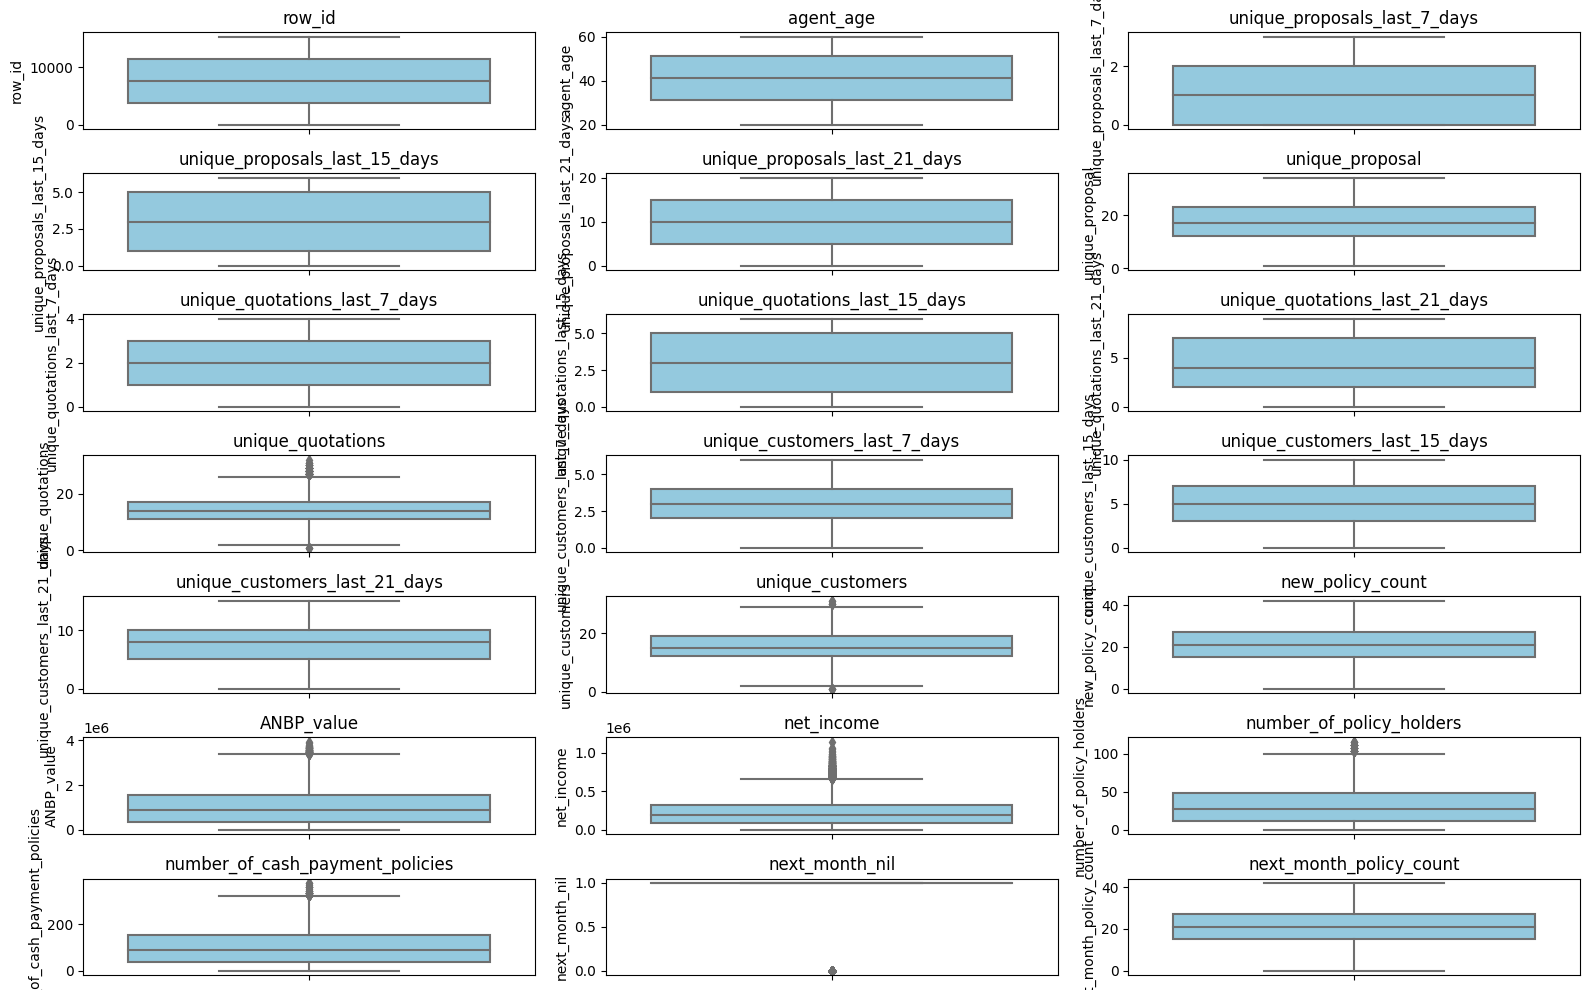

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Set up the plot size
plt.figure(figsize=(16, 10))

# Loop through each numerical column and plot a boxplot
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot((len(numerical_df.columns) + 2) // 3, 3, i)
    sns.boxplot(y=numerical_df[column], color='skyblue')
    plt.title(column)

plt.tight_layout()
plt.show()


**Potential outliers in ['ANBP Value','net income','number of policy holders','number of cash payment policies',unique quatations']**

Data Quality Issues

    categorical columns with too many unique values (high cardinality)

    E.g., “The agent_code field has over 15,000 unique values, which could impact model complexity.”

# 2. Sales Patterns by Month (Time Series Patterns)

Goal: Identify trends, seasonality, spikes, or dips in key metrics like new_policy_count.

<Axes: title={'center': 'Monthly New Policy Count Trend'}, xlabel='year_month'>

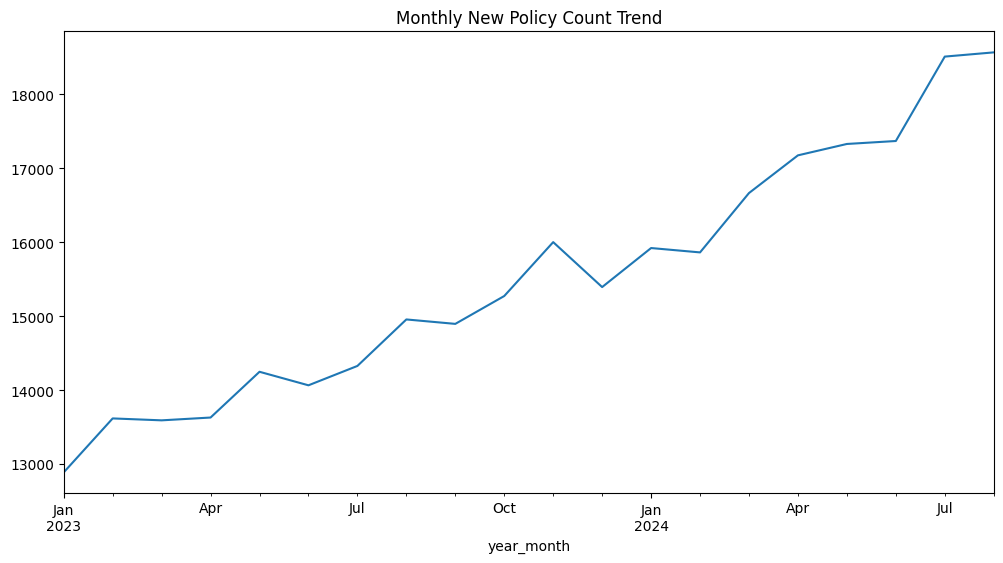

In [13]:
df['year_month'] = pd.to_datetime(df['year_month'])
monthly_trend = df.groupby(df['year_month'].dt.to_period('M'))['new_policy_count'].sum()

monthly_trend.plot(figsize=(12, 6), title="Monthly New Policy Count Trend")


Sales Trends Over Time

    Sales show an overall increasing trend over time.

    While there's no clear seasonality, there are distinct spikes and dips in performance.

    Next, we will explore the top features over time to uncover possible causes behind these fluctuations.

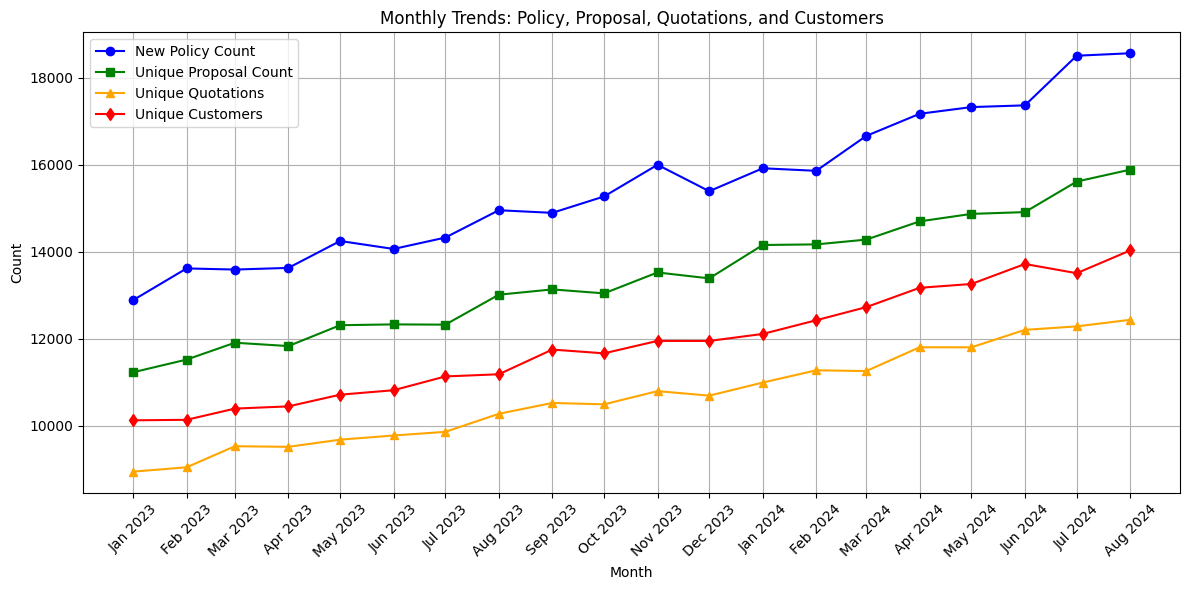

In [17]:

# Convert 'year_month' column to datetime
df['year_month'] = pd.to_datetime(df['year_month'])

# Group and aggregate all relevant columns
monthly_data = df.groupby('year_month')[['new_policy_count', 'unique_proposal', 'unique_quotations', 'unique_customers']].sum()

# Plot all in one figure
plt.figure(figsize=(12, 6))

plt.plot(monthly_data.index, monthly_data['new_policy_count'], marker='o', label='New Policy Count', color='b')
plt.plot(monthly_data.index, monthly_data['unique_proposal'], marker='s', label='Unique Proposal Count', color='g')
plt.plot(monthly_data.index, monthly_data['unique_quotations'], marker='^', label='Unique Quotations', color='orange')
plt.plot(monthly_data.index, monthly_data['unique_customers'], marker='d', label='Unique Customers', color='red')

# Titles and labels
plt.title('Monthly Trends: Policy, Proposal, Quotations, and Customers')
plt.xlabel('Month')
plt.ylabel('Count')

# Format x-axis
plt.xticks(ticks=monthly_data.index, labels=monthly_data.index.strftime('%b %Y'), rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


From the above charts, we can clearly observe that the unique proposal count and the new policy count follow similar fluctuating patterns over time.
This strong alignment suggests that the number of unique proposals is a key driver behind the variations in new policy counts.

# 3. Multivariate Analysis (Interaction of Numerical Features)

Goal: Understand how variables relate to each other and to the target.

**Correalation heat map for identify linear ralations**

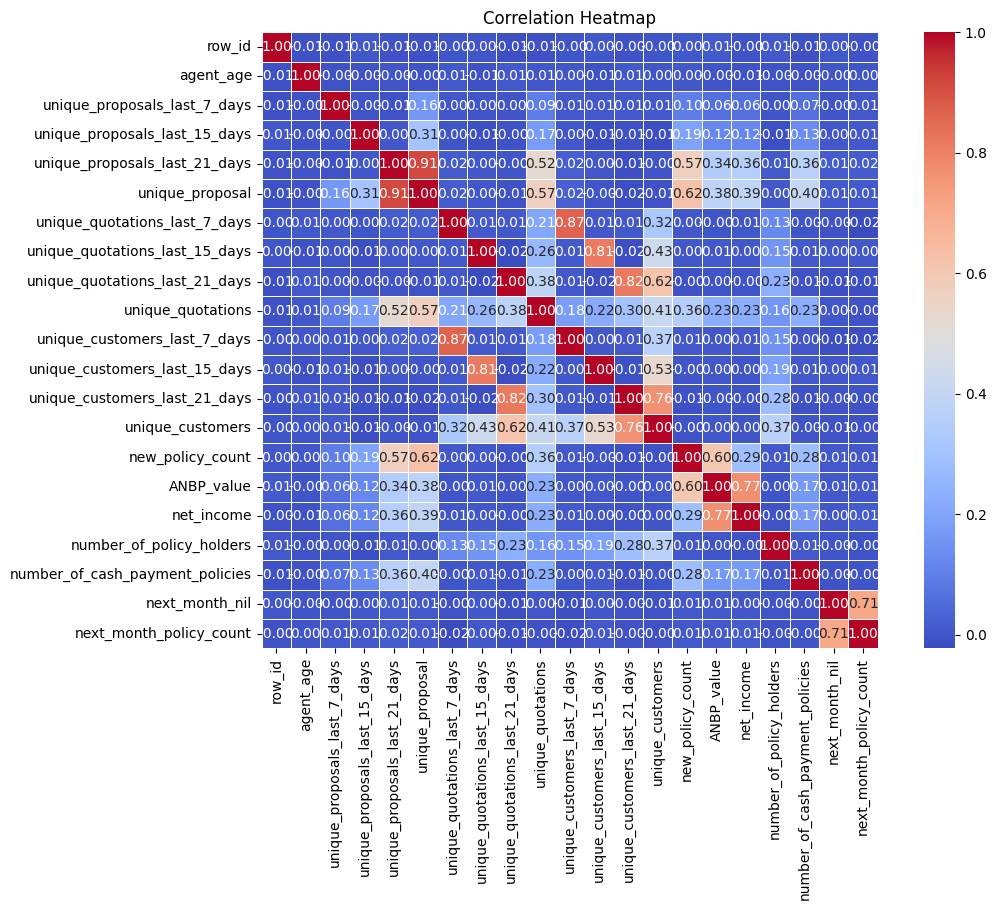

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



We noted that there is no any high correlation between each feature.So we measure MI score for identify best features to predict following month counts


MI scores

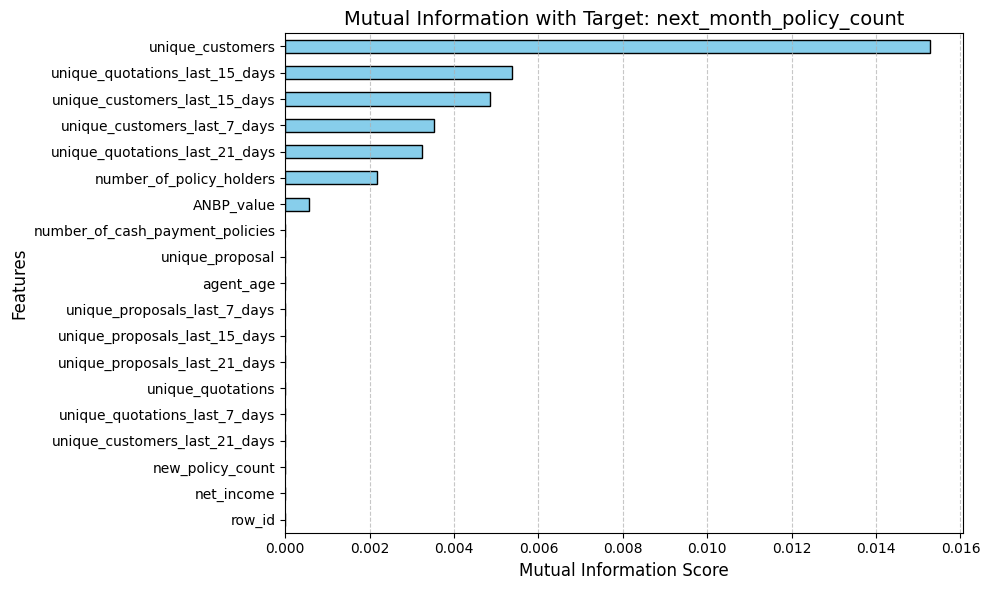

In [23]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns=['next_month_policy_count','next_month_nil'])
X=X.select_dtypes(include=['int64', 'float64'])
y = df['next_month_policy_count']

mi = mutual_info_regression(X, y, random_state=0)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mi_series.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Mutual Information with Target: next_month_policy_count', fontsize=14)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In here we can identfy that best features to predit next month counts are unique costomers,unique_qautaions_last_15 _days etc.

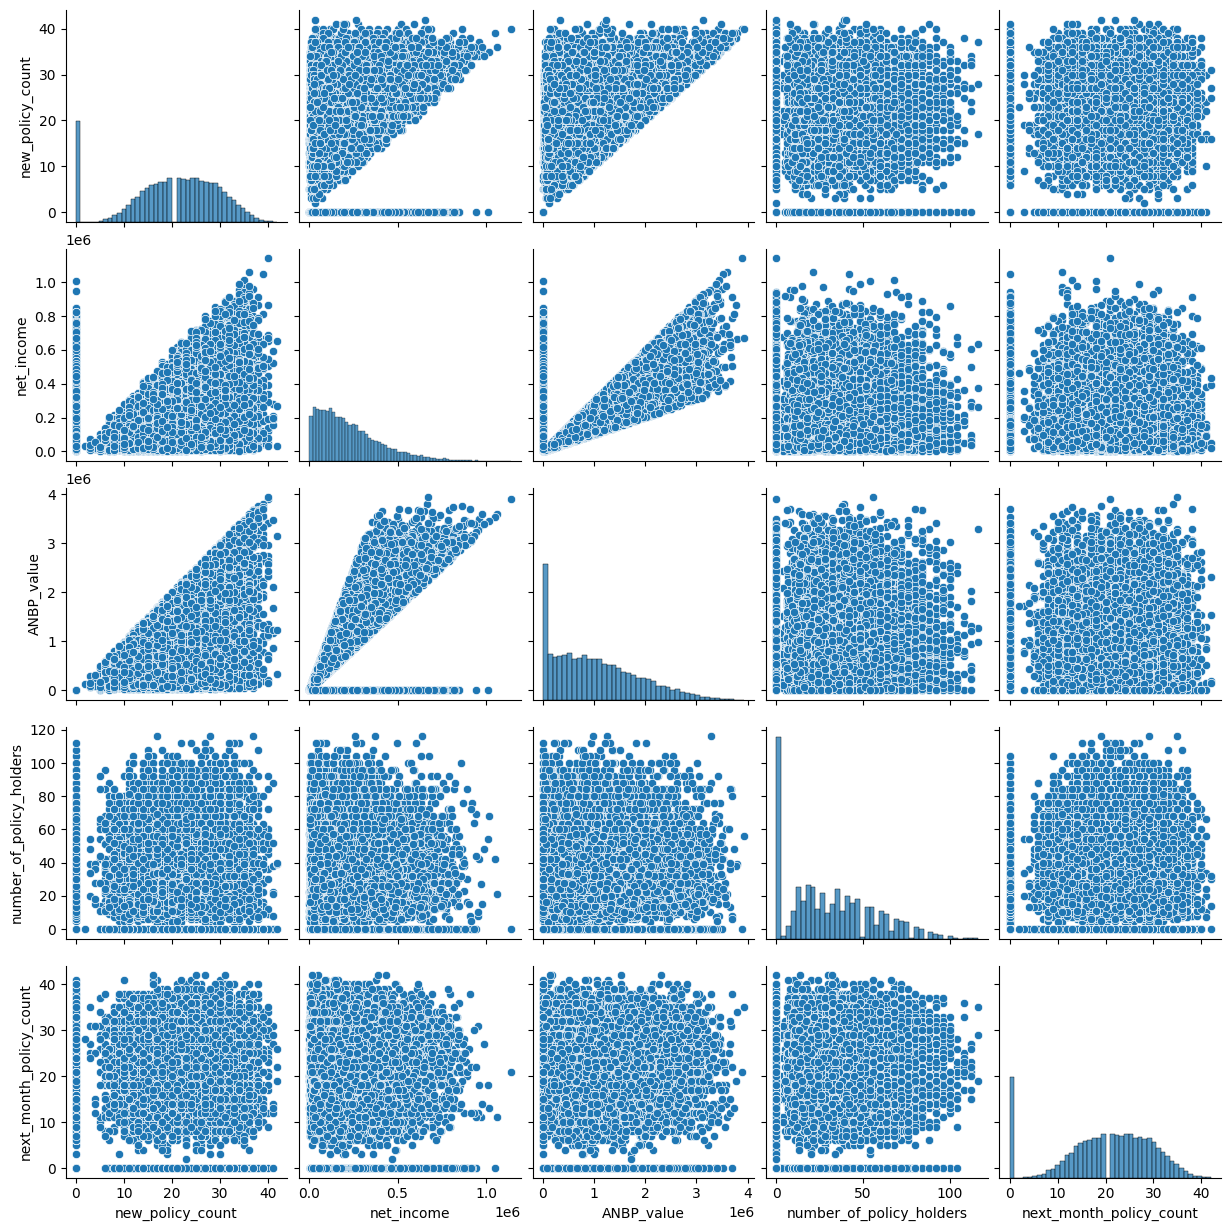

In [25]:
sns.pairplot(df[['new_policy_count', 'net_income', 'ANBP_value', 'number_of_policy_holders','next_month_policy_count']])


From this pair plotes we can take valueble insigts about how ANBP_value calculated.
*for obtain a perticuler ANBP value agent have to pass a limit on net income and new_policy count

by pair plots we can see that no relation between new_policy count and next_month policy counts,but if net incomes and ANBP values are high means that agent have law risk of get nil in follwing month

# 4. Agent Trajectories Over Time

Goal: See how individual agents evolve—who improves, who stagnates.

Then we analyse for each agents data raws to idetify any patterns possible in their sales with time.

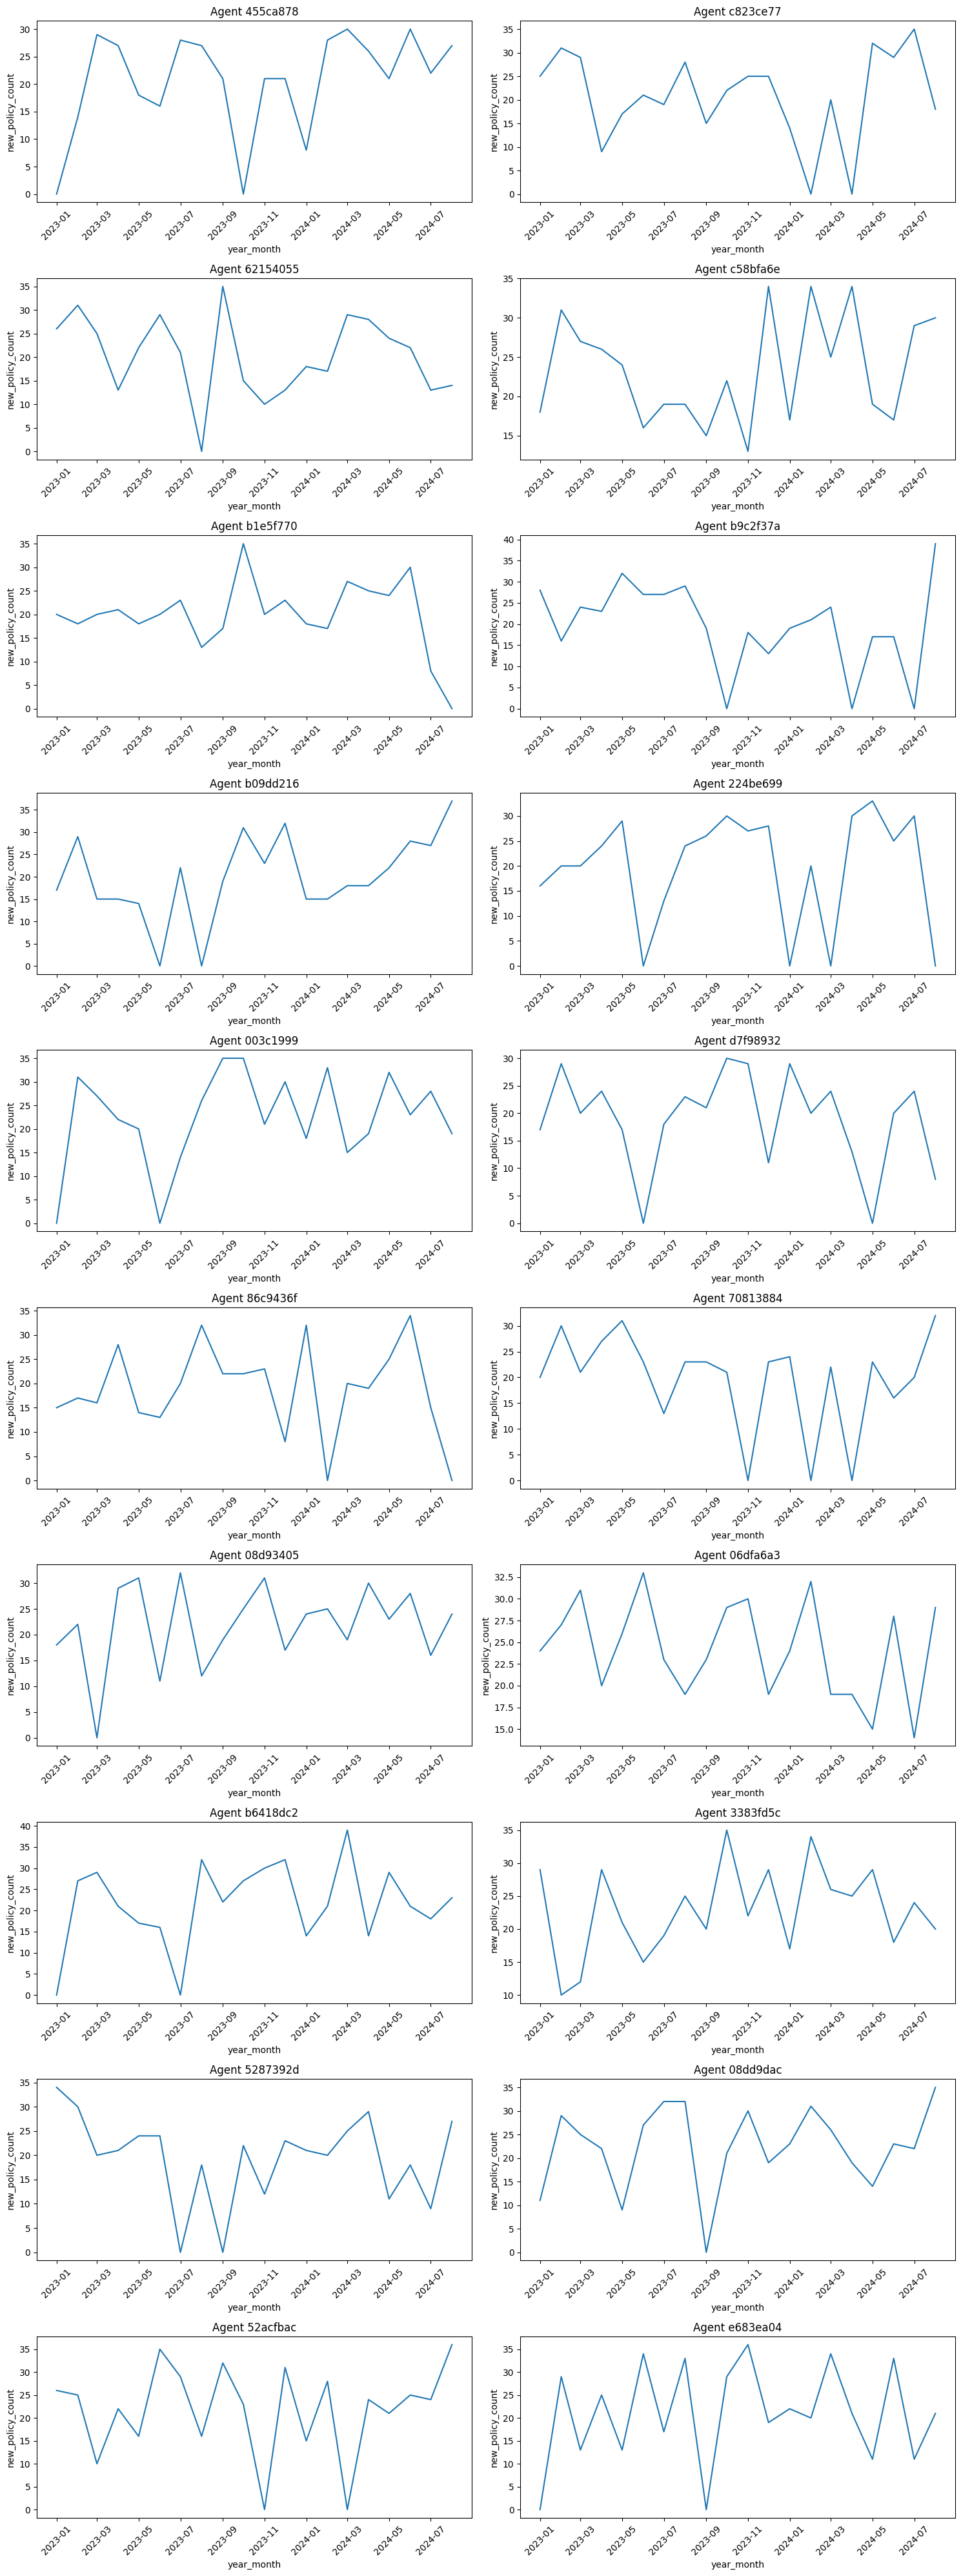

In [26]:
first_20_agents = list(df['agent_code'].unique())[:20]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 40)) 
axes = axes.flatten() 

for i, agent in enumerate(first_20_agents):
    agent_df = df[df['agent_code'] == agent]
    sns.lineplot(x='year_month', y='new_policy_count', data=agent_df, ax=axes[i])
    axes[i].set_title(f'Agent {agent}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

we noticed that any seasonal trends cant be capture from this.by that we dicided time series forecasting for agents is not suitable to predict their future.

<Axes: xlabel='year_month', ylabel='new_policy_count'>

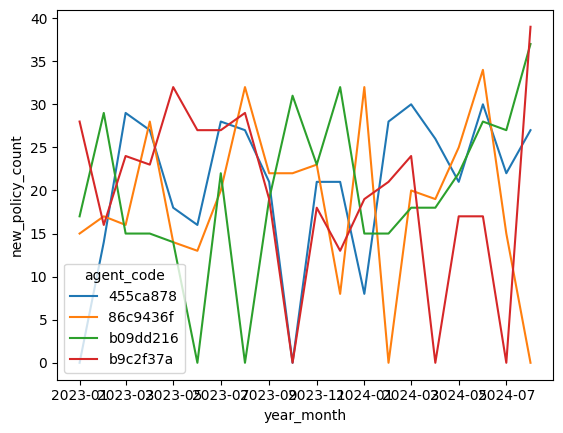

In [35]:
agent_trends = df.groupby(['agent_code', 'year_month'])['new_policy_count'].sum().reset_index()

# Visualize for a sample of agents
sample_agents =['b09dd216','455ca878','b9c2f37a','86c9436f'] 
sns.lineplot(data=agent_trends[agent_trends['agent_code'].isin(sample_agents)],
             x='year_month', y='new_policy_count', hue='agent_code')


Agent Performance Insights

We observe that while some agents have consistently low policy counts, others show a clear improvement in their performance over time. These upward trends indicate potential best practices or characteristics contributing to success. By analyzing the traits, behaviors, and actions of these improving agents, we can formulate targeted recommendations to support and uplift underperforming agents, helping them grow in their careers.

# 5. Innovative EDA (Hidden Insights)

Goal: Go beyond traditional plots—find non-obvious patterns.

Anomaly Detection

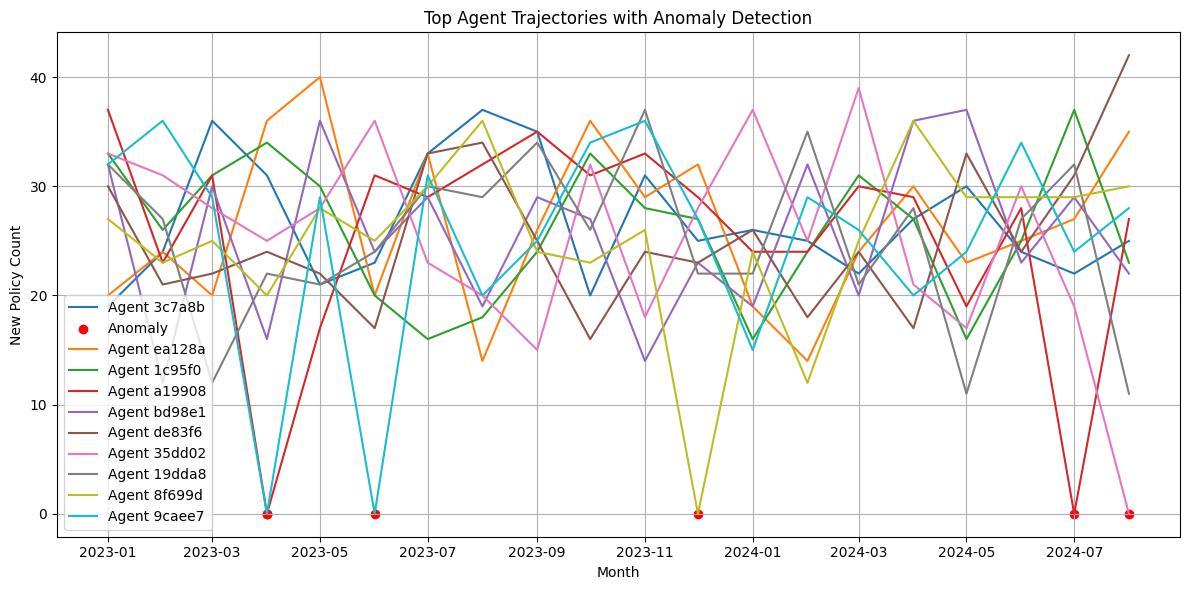

In [39]:
import numpy as np
from scipy.stats import zscore

# Compute agent-wise z-score of new_policy_count
df['policy_zscore'] = df.groupby('agent_code')['new_policy_count'].transform(zscore)

# Flag anomalous low-performing months (z-score < -2)
df['anomaly'] = df['policy_zscore'] < -2

# Example plot for top 5 agents by volume
top_agents = df.groupby('agent_code')['new_policy_count'].sum().nlargest(10).index

plt.figure(figsize=(12, 6))
for agent in top_agents:
    agent_data = df[df['agent_code'] == agent]
    plt.plot(agent_data['year_month'], agent_data['new_policy_count'], label=f'Agent {agent[:6]}')
    plt.scatter(agent_data[agent_data['anomaly']]['year_month'],
                agent_data[agent_data['anomaly']]['new_policy_count'],
                color='red', label='Anomaly' if agent == top_agents[0] else "")

plt.title('Top Agent Trajectories with Anomaly Detection')
plt.xlabel('Month')
plt.ylabel('New Policy Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Sudden Performance Drops

    High-performing agents who experience sudden dips in new policy counts (detected as anomalies) are identified,we have to consider about these agents most.

we can these anomalies to behavioral Clustering,
 since we can see that some anomalies during the same time